<a href="https://colab.research.google.com/github/AzlinRusnan/Machine-Learning/blob/main/AzlinLearn_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervised Learning

### 1. Regression

### 1.1 Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Generate synthetic data
np.random.seed(0)
X = 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make predictions
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.0434333815695171
R^2 Score: 0.7424452332071367


**Mean Squared Error (MSE): 1.0434333815695171**

This value represents the average squared difference between the actual values (from your test set) and the predicted values. Since the MSE is around 1.04, it indicates that on average, the predictions are off by about 1.04 units squared. Lower MSE values indicate better model performance.

**R^2 Score: 0.7424452332071367**

The R^2 score is approximately 0.74. This means that about 74% of the variance in the dependent variable (y) can be explained by the independent variable (X) in your model. An R^2 score of 1 would mean a perfect fit, so a score of 0.74 indicates a fairly good fit, but there is still some unexplained variance in the data.


**Interpretation**

**MSE Interpretation:**

The MSE value of 1.04 suggests that there is some error in the model’s predictions. While this value is not extremely high, it indicates that the model’s predictions are not perfect and there is room for improvement.

**R^2 Score Interpretation:**

The R^2 score of 0.74 indicates that the model explains a substantial portion of the variance in the data, but not all of it. This is a reasonably good score for many practical purposes, suggesting that the model captures the underlying relationship between X and y fairly well, though there is still some variance that the model does not account for.

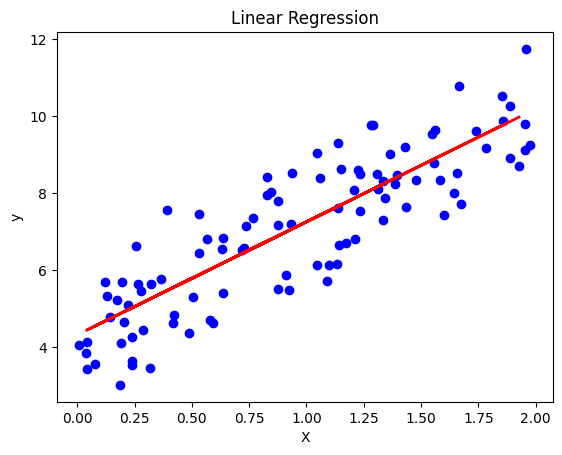

In [10]:
# Plotting the results
plt.scatter(X, y, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression")
plt.show()

**Visual Interpretation**


**Scatter Plot:**

The scatter plot shows the actual data points (blue dots) and the model’s predictions (red line). The red line represents the linear relationship the model has learned. If the red line closely follows the trend of the blue dots, it indicates a good fit.

### 1.2 Polynomial Regression

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + X**2 + np.random.randn(100, 1)

# Transform data to include polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

In [13]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.028546780152737
R^2 Score: 0.8920251694824523


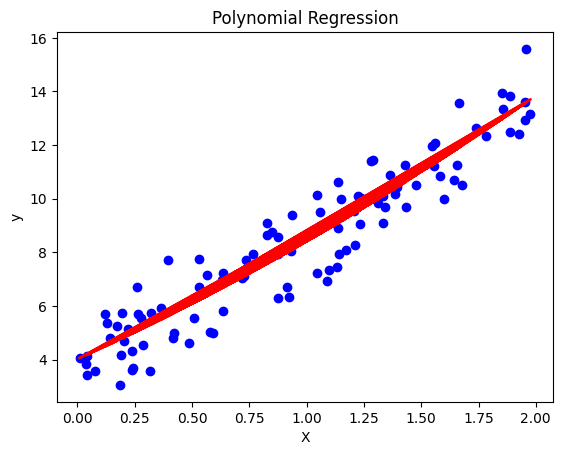

In [16]:
# Plotting the results
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(poly.fit_transform(X)), color='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.show()

### 2. Classification

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
data = load_breast_cancer()
X = data.data
y = data.target

In [39]:
# Convert to DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display the first few rows of the dataset
print(df.head())

df.columns

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [40]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9473684210526315
Confusion Matrix:
[[46  1]
 [ 5 62]]
